## 1. Reading images

In [2]:
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import cv2
import os
from PIL import Image

%matplotlib inline

In [4]:
# get the styles names
styles = os.listdir('archive')

# check how many files per style
for style in styles:
    os.listdir((f'archive/{style}/{style}'))
    print(style, len(os.listdir((f'archive/{style}/{style}'))))

Academic_Art 1305
Art_Nouveau 3035
Baroque 5312
Expressionism 2607
Japanese_Art 2235
Neoclassicism 3115
Primitivism 1324
Realism 5373
Renaissance 6192
Rococo 2521
Romanticism 6813
Symbolism 1510
Western_Medieval 1158


In [5]:
# test image
def print_test_image(style,i):
    img_name = os.listdir((f'archive/{style}/{style}'))[i]
    test_img = glob.glob(f'archive/{style}/{style}/{img_name}')
    test_img = mpimg.imread(test_img[0])
    print(test_img.shape)
    plt.imshow(test_img)

#### Japanese Art
Diverse art styles from Japan, including traditional forms like ukiyo-e woodblock prints, as well as contemporary art influenced by Japanese cultural aesthetics.

(3693, 1629, 3)


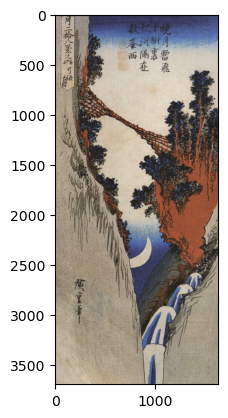

In [6]:
print_test_image('Japanese_Art', 0)

#### Rococo
An 18th-century style characterized by ornate and playful decoration. Commonly found in architecture, interior design, and painting.

(1000, 804, 3)


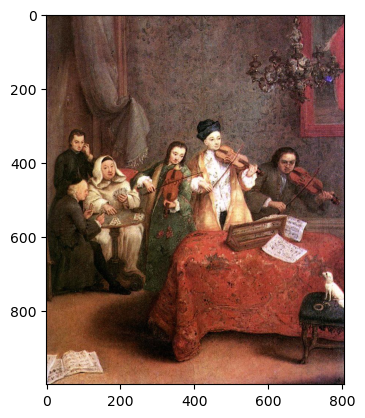

In [7]:
print_test_image('Rococo',0)

## 2. Preparing the data

In [42]:
#split the data into train and test directories
import shutil
import os
import random

random.seed(31101992)

# check if file is corrupted
def check_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.load()
        return True  
    except Exception as e:
        print(f"Error: {e}")
        return False 

def create_train_test(style):
    print(style)
    # 1. Read the files
    img_names = [] # to store images names
    split_size = 0.7

    for file in glob.glob(f'archive/{style}/{style}/*'):
        im = mpimg.imread(file)
    
        
        if len(im.shape) < 3: #skip black and white images
            continue
        
        if im.shape[2] != 3: #make sure to keep only RGB channels
            continue
        
        img_names.append(file.split('/')[-1])
        
    print("done reading files:",len(img_names))
    
    # 2. Shuffle
    random.shuffle(img_names)
        
    # 3. split
    start_index = int(len(img_names) * split_size)
    #train set 70% of the data
    train_set = img_names[:start_index]
    rest_set = img_names[start_index:]
    
    # 4. copy to train
    os.makedirs(f'train_test/train/{style}', exist_ok=True)
    
    source_directory = f'archive/{style}/{style}/'
    destination_directory = f'train_test/train/{style}/'

    
    for file_name in train_set:
        file_name = file_name.split('\\')[1]
        source_path = os.path.join(source_directory, file_name)
        destination_path = os.path.join(destination_directory, file_name)
        
        # copy title
        shutil.copy(source_path, destination_path)

    print("done copying train")


    # validation and test
    start_index = int(len(rest_set) * split_size)
    valid_set = rest_set[:start_index]
    test_set = rest_set[start_index:]

    # 5. copy to valid
    os.makedirs(f'train_test/valid/{style}', exist_ok=True)
    
    source_directory = f'archive/{style}/{style}/'
    destination_directory = f'train_test/valid/{style}/'

    for file_name in valid_set:
        file_name = file_name.split('\\')[1]
        source_path = os.path.join(source_directory, file_name)
        destination_path = os.path.join(destination_directory, file_name)
        # copy tile
        shutil.copy(source_path, destination_path)
        
    print("done copying valid")


    # 6. copy to test
    os.makedirs(f'train_test/test/{style}', exist_ok=True)
    
    source_directory = f'archive/{style}/{style}/'
    destination_directory = f'train_test/test/{style}/'

    for file_name in test_set:
        file_name = file_name.split('\\')[1]
        source_path = os.path.join(source_directory, file_name)
        destination_path = os.path.join(destination_directory, file_name)
        # copy tile
        shutil.copy(source_path, destination_path)
        
    print("done copying test")
    
    print("train:", len(train_set),  "valid:", len(valid_set),  "test:", len(test_set), "\n")

In [43]:
styles = ['Japanese_Art','Rococo']
for style in styles:
    create_train_test(style)

Japanese_Art
done reading files: 2207
done copying train
done copying valid
done copying test
train: 1544 valid: 464 test: 199 

Rococo
done reading files: 2479
done copying train
done copying valid
done copying test
train: 1735 valid: 520 test: 224 

